<a href="https://colab.research.google.com/github/adnajihad/w2v/blob/main/w2v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from glob import glob
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import utils
import gensim.models
from sklearn.decomposition import IncrementalPCA    
from sklearn.manifold import TSNE                   
import numpy as np
from gensim.test.utils import datapath
import pprint

In [2]:
!git clone https://github.com/adnajihad/w2v

Cloning into 'w2v'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 101 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (101/101), 107.39 KiB | 901.00 KiB/s, done.


In [3]:
files = glob('w2v/*.txt')

with open('articles.txt', 'w') as f:
    for file in files:
        with open(file) as infile:
            f.write(infile.read()+'\n')

In [4]:
class MyCorpus(object): 
    def __iter__(self):
        corpus_path = 'articles.txt'
        for line in open(corpus_path):
            yield utils.simple_preprocess(line)

In [5]:
sentences = MyCorpus()
model1 = gensim.models.Word2Vec(sentences=sentences, size=100,min_count=1)
model5 = gensim.models.Word2Vec(sentences=sentences, size=100,min_count=5)

2020-12-20 09:46:25,092 : INFO : collecting all words and their counts
2020-12-20 09:46:25,094 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-12-20 09:46:25,145 : INFO : collected 5816 word types from a corpus of 31292 raw words and 939 sentences
2020-12-20 09:46:25,146 : INFO : Loading a fresh vocabulary
2020-12-20 09:46:25,160 : INFO : effective_min_count=1 retains 5816 unique words (100% of original 5816, drops 0)
2020-12-20 09:46:25,161 : INFO : effective_min_count=1 leaves 31292 word corpus (100% of original 31292, drops 0)
2020-12-20 09:46:25,181 : INFO : deleting the raw counts dictionary of 5816 items
2020-12-20 09:46:25,183 : INFO : sample=0.001 downsamples 35 most-common words
2020-12-20 09:46:25,184 : INFO : downsampling leaves estimated 27747 word corpus (88.7% of prior 31292)
2020-12-20 09:46:25,209 : INFO : estimated required memory for 5816 words and 100 dimensions: 7560800 bytes
2020-12-20 09:46:25,210 : INFO : resetting layer weights
20

# No 1

In [8]:
vec_1 = model1.wv['sepatu']
print(vec_1)

[-0.2744815  -0.24860905 -0.19725688  0.30477363  0.23640114  0.07281123
  0.00417111  0.21883655  0.00106687 -0.06808897 -0.00942296 -0.15091392
  0.08694048 -0.10692924  0.0173739   0.01511578  0.01208625 -0.00795735
  0.03220987  0.32445005 -0.10114547  0.1843183   0.09765869 -0.21447118
 -0.00541203 -0.2070705  -0.052764   -0.31133375 -0.06026715 -0.13266246
  0.02876893 -0.10328366  0.37193605 -0.27222773  0.21443011 -0.02126584
  0.11436826  0.39249146 -0.09373166 -0.14076267 -0.1280189  -0.09870415
 -0.2574696   0.22278343 -0.12174039  0.0964167  -0.21937773 -0.11734296
  0.09563325  0.00655948 -0.20701155  0.23606016  0.1588545   0.08778436
 -0.10401725  0.04071174 -0.07140683  0.22453454 -0.06682429 -0.04868509
  0.11206944 -0.07154433 -0.11517947 -0.13289347 -0.15066296 -0.05077643
  0.08922306 -0.40652907  0.05541596  0.07128102 -0.24894188  0.21493767
  0.19255005  0.12182203  0.10007418 -0.05861023 -0.20643291 -0.14419112
 -0.15958121 -0.10525864  0.09150415  0.22626512 -0

In [9]:
vec_5 = model5.wv['sepatu']
print(vec_5)

[-0.56621754 -0.2524417  -0.48654133  0.55197847  0.4206269   0.11899033
 -0.1402769   0.313025    0.08302393  0.00332929 -0.19525215 -0.18081436
  0.00471026 -0.25342634  0.12154628 -0.03889385  0.17642738 -0.07622301
 -0.02302111  0.56404376 -0.02303769  0.42346716  0.17714089 -0.36706534
  0.07319418 -0.28717634  0.04199585 -0.42429987 -0.08817704 -0.2079668
 -0.0861508  -0.14598581  0.6011162  -0.42591915  0.3373382  -0.14463207
  0.30760503  0.5342055  -0.09728976 -0.07813318 -0.28732398 -0.11440514
 -0.33849156  0.28672758 -0.05595147  0.19321972 -0.19839996 -0.06114317
  0.21664572 -0.153979   -0.21060617  0.53893816  0.36073798  0.11172413
 -0.2918263  -0.05924384 -0.1085689   0.34017244  0.13169588  0.04608608
  0.10198689 -0.09719064 -0.22432412 -0.02649073 -0.2474198  -0.16670486
  0.4052366  -0.65887934 -0.08277097  0.0303815  -0.29584423  0.39333832
  0.47602317  0.40944535 -0.07357981 -0.11798892 -0.684633   -0.14976427
 -0.30542958 -0.27423516  0.2792294   0.32317704 -0.

# No 2

## model 1

Similarity > 0,5

In [10]:
print(model1.wv.similarity('sepatu', 'sampah'))

0.99963826


0 < Similarity < 0,5

In [93]:
print(model1.wv.similarity('botol', 'news'))

0.53758425


-1 < Similarity < -0,5

In [94]:
print(model1.wv.similarity('murah', 'mengoptimalkan'))

0.26322985


## model 2

In [97]:
print(model5.wv.similarity('sepatu', 'sampah'))

0.99989283


In [99]:
print(model5.wv.similarity('botol', 'telkomsel'))

0.99926585


In [103]:
print(model5.wv.similarity('memanfaatkan', 'teknologi'))

0.99644196


# No 3

In [107]:
pprint.pprint(model1.wv.most_similar(positive=['sepatu'], topn=5))

[('yang', 0.9997712969779968),
 ('nike', 0.9997680187225342),
 ('akan', 0.9997578263282776),
 ('atau', 0.9997564554214478),
 ('dan', 0.999749481678009)]


In [108]:
pprint.pprint(model5.wv.most_similar(positive=['sepatu'], topn=5))

[('nike', 0.9999204874038696),
 ('yang', 0.9999176263809204),
 ('bahan', 0.999914288520813),
 ('dari', 0.999908447265625),
 ('ini', 0.999907910823822)]


# No 4

In [109]:
def reduce_dimensions(model):
    num_dimensions = 2 

    vectors = [] 
    labels = [] 
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [110]:
x_vals1, y_vals1, labels1 = reduce_dimensions(model1)
x_vals5, y_vals5, labels5 = reduce_dimensions(model5)

In [111]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

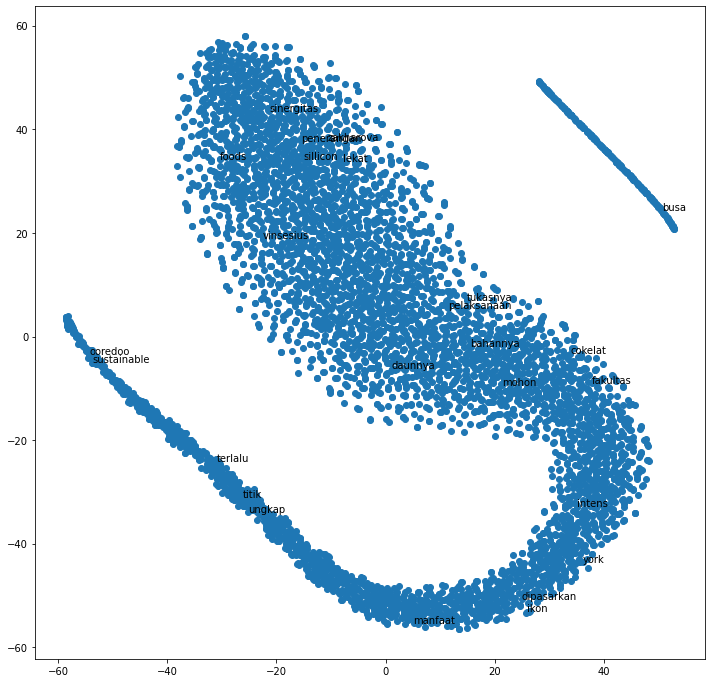

In [112]:
plot_with_matplotlib(x_vals1, y_vals1, labels1)

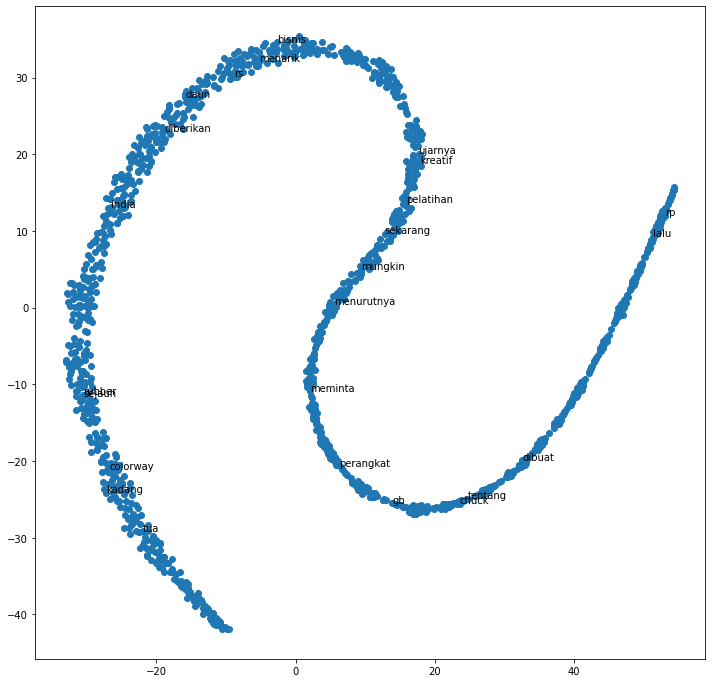

In [113]:
plot_with_matplotlib(x_vals5, y_vals5, labels5)